# Heart Disease Prediction with Logistic Regression

In this project, we'll use a dataset to predict the risk of heart disease based on various health features such as age, blood pressure, cholesterol, and more. The target variable is "condition," where:
- **0** indicates no heart disease
- **1** indicates the presence of heart disease

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("heart_cleveland_upload.csv")

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


| **Feature**       | **Description**                                                                                                                                      |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **age**           | Represents the **age** of the individual in years.                                                                                                  |
| **sex**           | Represents the **sex** of the individual. <br> **1.0**: Male <br> **0.0**: Female                                                                  |
| **cp**            | Represents the **chest pain type**. <br> **0.0**: Typical angina <br> **1.0**: Atypical angina <br> **2.0**: Non-anginal pain <br> **3.0**: Asymptomatic |
| **trestbps**      | Represents the **resting blood pressure** (mmHg).                                                                                                   |
| **chol**          | Represents the **serum cholesterol** level (mg/dl).                                                                                                |
| **fbs**           | Represents **fasting blood sugar** level. <br> **1.0**: Fasting blood sugar > 120 mg/dl <br> **0.0**: Fasting blood sugar <= 120 mg/dl               |
| **restecg**       | Represents the **resting electrocardiographic results**. <br> **0.0**: Normal <br> **1.0**: ST-T wave abnormality <br> **2.0**: Left ventricular hypertrophy |
| **thalach**       | Represents the **maximum heart rate achieved** during exercise.                                                                                   |
| **exang**         | Represents whether the individual experienced **exercise-induced angina**. <br> **1.0**: Yes <br> **0.0**: No                                     |
| **oldpeak**       | Represents the **depression of the ST segment** induced by exercise relative to rest (in mm).                                                      |
| **slope**         | Represents the **slope of the peak exercise ST segment**. <br> **0.0**: Upsloping <br> **1.0**: Flat <br> **2.0**: Downsloping                     |
| **ca**            | Represents the number of **major vessels colored by fluoroscopy** (angiogram) that have blockages. <br> Values range from 0 to 4.                    |
| **thal**          | Represents the individual's **thalassemia** status. <br> **0.0**: Normal <br> **1.0**: Fixed defect <br> **2.0**: Reversible defect                   |
| **condition**     | Represents whether the individual has **heart disease**. <br> **0.0**: No heart disease <br> **1.0**: Heart disease present                        |


## Data Exploration & Understanding

We now explore the dataset to understand its structure. We'll check for missing values and get a summary of the data types. We now explore the dataset to understand its structure. We'll check for missing values and get a summary of the data types. 

We also need to check the target class distribution. If the dataset is imbalanced (e.g., many more 0 than 1), the model might overpredict the majority class

Then we visualize the dataset using a histogram


In [3]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# View basic info: data types, non-null counts
print("\nData types and nulls:")
df.info()


Dataset shape: (297, 14)

Missing values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  co

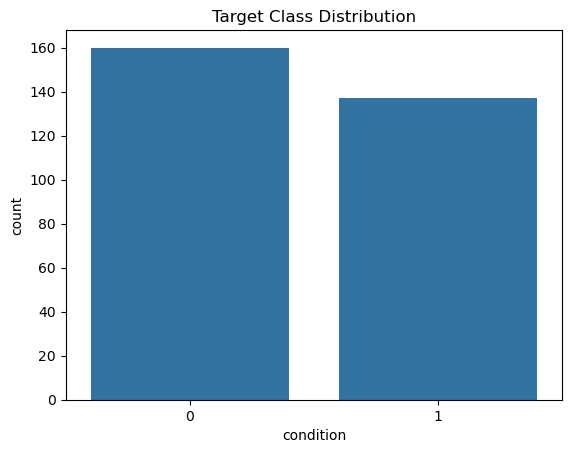

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='condition', data=df)
plt.title("Target Class Distribution")
plt.show()


We see that this is fairly balanced (roughly 54% and 46%), so we don't need to worry about a significant class imbalance

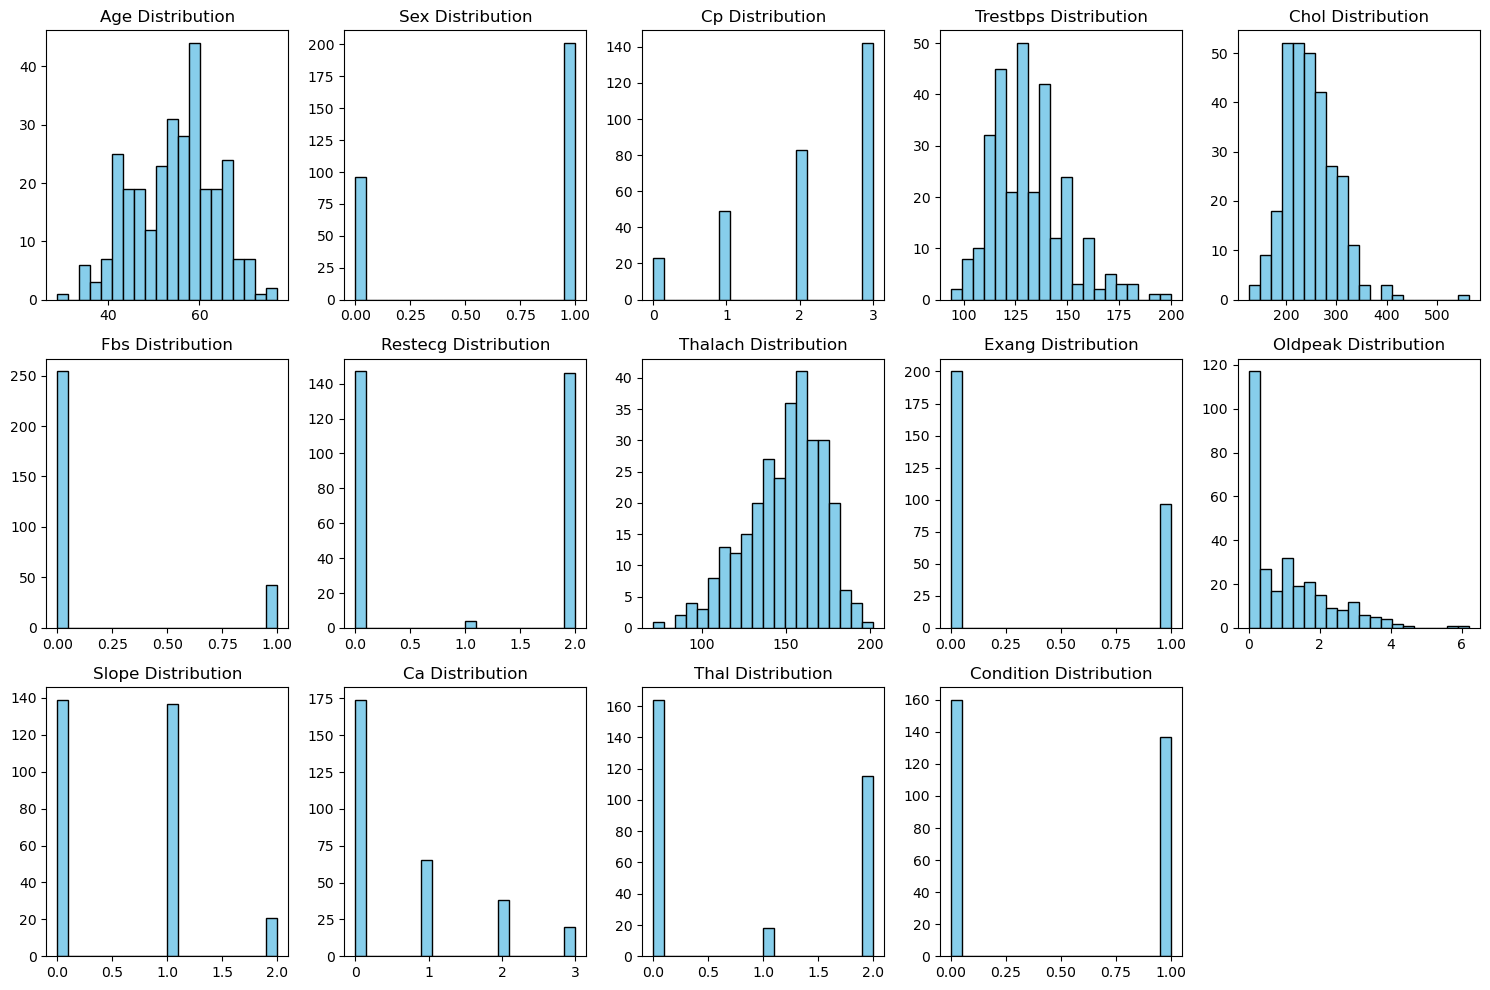

In [4]:
import matplotlib.pyplot as plt

# Set the figure size for all plots
plt.figure(figsize=(15, 10))

# Loop through all columns and plot a histogram for each
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns for plotting
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')  # Simple histogram
    plt.title(f'{column.capitalize()} Distribution')
    plt.tight_layout()


# Save the plot as a PNG image
plt.savefig('feature_histograms.png')

# Show the plots
plt.show()
plt.close()

## Data Preprocessing

In [7]:
# Separate the features (X) and target (y)
X = df.drop("condition", axis=1)  # All columns except 'condition'
y = df["condition"]  # The target column
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[ 1.60030243  0.69109474 -2.24062879 ...  0.6437811   0.34482438
  -0.87429153]
 [ 1.60030243 -1.44697961 -2.24062879 ... -0.97658319  1.41162482
  -0.87429153]
 [ 1.26824154 -1.44697961 -2.24062879 ...  2.26414539 -0.72197605
  -0.87429153]
 ...
 [-2.16305433  0.69109474  0.87388018 ...  0.6437811  -0.72197605
   1.21977769]
 [-2.16305433 -1.44697961  0.87388018 ... -0.97658319 -0.72197605
  -0.87429153]
 [-2.16305433  0.69109474  0.87388018 ... -0.97658319 -0.72197605
   1.21977769]]


## Split the Data into Training and Test Sets, and Train the Logistic Regression Model
train_test_split() splits your dataset into random subsets
Setting random_state=42 (or any fixed integer) makes sure that every time you run the code, the same split is generated.
Why 42? reference from The Hitchhiker's Guide to the Galaxy — "42 is the answer to life, the universe, and everything", any integer works

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"The dimension of the entire dataset without the condition result is {X_scaled.shape}")
print(f"The dimension of the training dataset is {X_train.shape}")
print(f"The dimension of the testing dataset is {X_test.shape}")

The dimension of the entire dataset without the condition result is (297, 13)
The dimension of the training dataset is (237, 13)
The dimension of the testing dataset is (60, 13)


In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)  # Increase iterations if convergence warnings

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Evaluate the model

Accuracy: 0.7333

Confusion Matrix:
[[23  9]
 [ 7 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



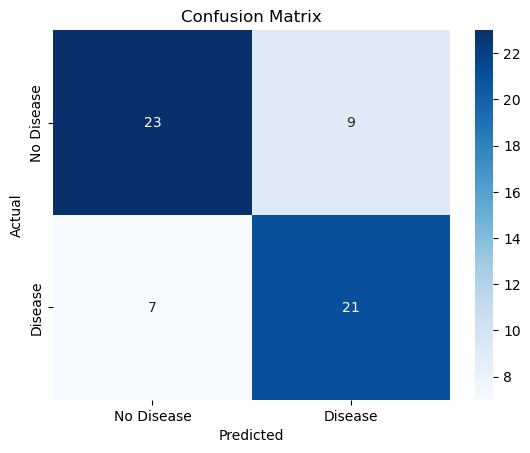

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Predict on the test set
y_pred = model.predict(X_test)

#Compute teh confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix (True Positives, False Positives, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig('Confusion_matrix.png')
plt.show()
plt.close()



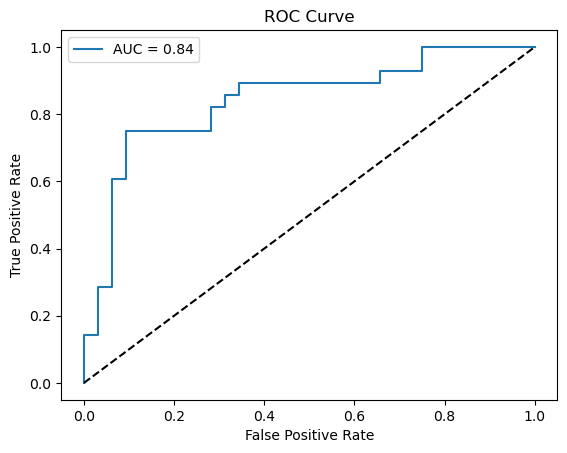

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC curve)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('ROC Curve.png')
plt.show()
plt.close()

We’ll evaluate different threshold values and plot the precision-recall curve and ROC curve at various thresholds to see how the model’s performance changes.

In [17]:
def predict_risk():
    # === Example patient values ===

    # 1. Age of the patient in years
    age = 35

    # 2. Sex: 1 = male, 0 = female
    sex = 0

    # 3. Chest pain type (cp):
    #    0 = typical angina
    #    1 = atypical angina
    #    2 = non-anginal pain
    #    3 = asymptomatic
    cp = 0

    # 4. Resting blood pressure (trestbps) in mm Hg
    trestbps = 110

    # 5. Serum cholesterol (chol) in mg/dl
    chol = 180

    # 6. Fasting blood sugar > 120 mg/dl: 1 = true, 0 = false
    fbs = 0

    # 7. Resting ECG results (restecg):
    #    0 = normal
    #    1 = ST-T wave abnormality
    #    2 = left ventricular hypertrophy
    restecg = 0

    # 8. Maximum heart rate achieved (thalach)
    thalach = 190

    # 9. Exercise induced angina (exang): 1 = yes, 0 = no
    exang = 0

    # 10. ST depression induced by exercise (oldpeak)
    oldpeak = 0

    # 11. Slope of the ST segment (slope):
    #     0 = upsloping
    #     1 = flat
    #     2 = downsloping
    slope = 0

    # 12. Number of major vessels colored by fluoroscopy (ca): 0–3
    ca = 0

    # 13. Thalassemia (thal):
    #     1 = normal
    #     2 = fixed defect
    #     3 = reversible defect
    thal = 1

    # === Prepare input for prediction ===
    input_features = np.array([[age, sex, cp, trestbps, chol, fbs,
                                restecg, thalach, exang, oldpeak,
                                slope, ca, thal]])

    # Predict the probability of heart disease
    risk_probability = model.predict_proba(input_features)[:, 1][0]

    # Output the predicted risk as a percentage
    print(f"\n🔍 Predicted Risk of Heart Disease: {risk_probability * 100:.2f}%")

# Call the function
predict_risk()




🔍 Predicted Risk of Heart Disease: 0.00%


C:\Users\shrey\AppData\Local\Temp\ipykernel_33424\1091095857.py:20: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum((y_pred_threshold == 1) & (y_test == 1)) / np.sum(y_pred_threshold == 1)  # Precision


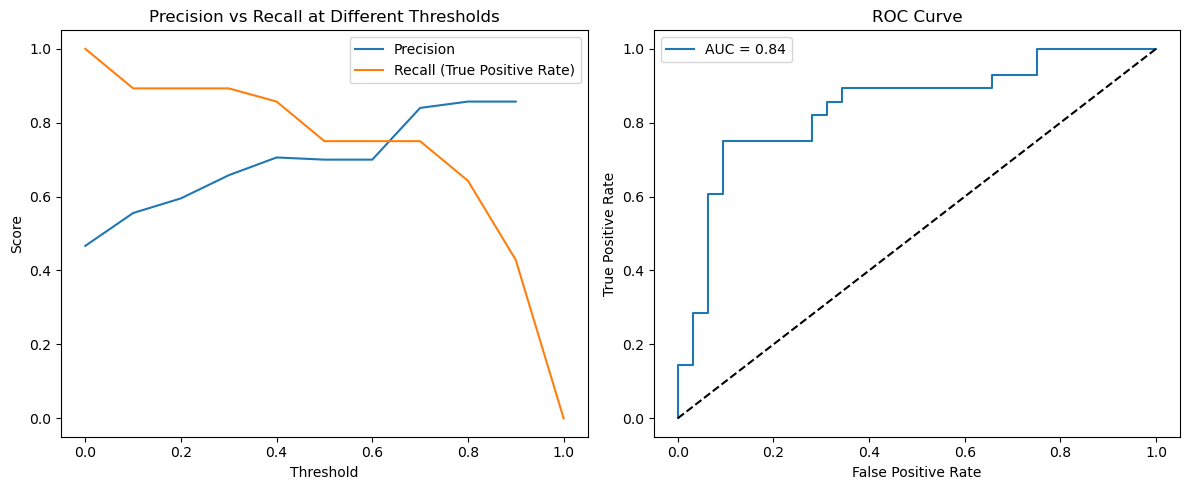

In [14]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Initialize lists to store results
thresholds = np.arange(0.0, 1.1, 0.1)
tpr_list = []  # True Positive Rate (Recall)
fpr_list = []  # False Positive Rate
precision_list = []  # Precision

# Loop through different thresholds to compute TPR, FPR, Precision
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Calculate metrics for each threshold
    tpr = np.sum((y_pred_threshold == 1) & (y_test == 1)) / np.sum(y_test == 1)  # TPR = TP / (TP + FN)
    fpr = np.sum((y_pred_threshold == 1) & (y_test == 0)) / np.sum(y_test == 0)  # FPR = FP / (FP + TN)
    precision = np.sum((y_pred_threshold == 1) & (y_test == 1)) / np.sum(y_pred_threshold == 1)  # Precision
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(precision)

# Plot Precision vs Recall (at different thresholds)
plt.figure(figsize=(12, 5))

# Precision-Recall curve
plt.subplot(1, 2, 1)
plt.plot(thresholds, precision_list, label="Precision")
plt.plot(thresholds, tpr_list, label="Recall (True Positive Rate)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall at Different Thresholds")
plt.legend()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.tight_layout()

plt.savefig('PrecisionRecall.png')
plt.show()
plt.close()